In [1]:
import numpy as np
from pathlib import Path
import pandas as pd
from skimage import io
from scipy.stats import zscore

from utilities import Experiment

from matplotlib import pyplot as plt
%matplotlib notebook

import seaborn as sns
sns.set(style="ticks", palette="deep")
plt.style.use('v_arial')
c = sns.color_palette()

## Load experiment data

Load experiment with the Experiment class:

In [2]:
exp = Experiment(r"J:\_Shared\stytra\manuscript\datasets\example_closed_loop_embedded\181115_f10")

Use experiment class methods for loading logs from the experiment:

In [3]:
tail_log_df = exp.behavior_log.set_index("t")  # DataFrame with the tail trace
estm_log_df = exp.estimator_log.set_index("t")  # DataFrame with vigour estimator
stim_log_df = exp.stimulus_param_log.set_index("t")  # DataFrame with gratings data

In [4]:
# Find start and end times of every stimulus using the dataframe with the baseline grating velocity:
vel_arr = stim_log_df["closed loop 1D_base_vel"].as_matrix()
gain_arr = stim_log_df["closed loop 1D_gain"].as_matrix()
start_idxs = np.argwhere(np.diff(vel_arr) < 0)[:,0]
end_idxs = np.argwhere(np.diff(vel_arr) > 0)[:,0]

start_times = stim_log_df.index[start_idxs+1]
end_times = stim_log_df.index[end_idxs+1]
gains = gain_arr[start_idxs+1]

## Create figure with all the closed-loop experiment variables

In [18]:
stim_idx = 0
t_slice = slice(start_times[stim_idx]-2.5, end_times[stim_idx]+2)  # select stimulus time

tail_t = tail_log_df["tail_sum"][t_slice].index
tail = tail_log_df["tail_sum"][t_slice].values
vigor_t = estm_log_df["vigour"][t_slice].index
vigor = estm_log_df["vigour"][t_slice].values
stim_t = stim_log_df["closed loop 1D_base_vel"][t_slice].index
base_vel = stim_log_df["closed loop 1D_base_vel"][t_slice].values
final_vel = stim_log_df["closed loop 1D_vel"][t_slice].values

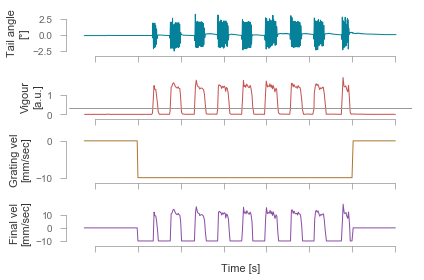

In [5]:


fig, axs = plt.subplots(4, 1, sharex=True)

plt.sca(axs[0])
plt.gca().xaxis.set_ticklabels([])
plt.ylabel('Tail angle\n[°]')

plt.sca(axs[1])
plt.axhline(0.3, c=(0.6,)*3)
plt.gca().xaxis.set_ticklabels([])
plt.ylabel('Vigour\n[a.u.]')

plt.sca(axs[2])
plt.plot(, c=c[2])
plt.gca().xaxis.set_ticklabels([])
plt.ylabel('Grating vel\n[mm/sec]')
# ax.get_xaxis().set_visible(False)
# sns.despine(bottom=True)

plt.sca(axs[3])
plt.plot(,  c=c[3])
# plt.xticks(xticks)
# plt.yticks([-15,0, 15])
plt.ylabel('Final vel\n[mm/sec]')
plt.xlabel('Time [s]')
sns.despine(trim=True, offset=3)

plt.tight_layout()

In [6]:
import plotly.graph_objs as go
from plotly import tools
import plotly.plotly as py
from plotly.graph_objs import Figure
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [28]:
len(stim_t)

366

In [42]:
traces = [go.Scatter(x=tail_t, y=tail, name="tail"),
          go.Scatter(x=vigor_t, y=vigor, name="vigor"),
          go.Scatter(x=stim_t, y=base_vel, name="grating speed"),
          go.Scatter(x=stim_t, y=final_vel, name="final speed")]
ylabels = ['[°]', '[a.u.]', '[mm/sec]', '[mm/sec]']


fig = tools.make_subplots(rows=4, cols=1, shared_xaxes=True)

for i in range(len(traces)):
    fig.append_trace(traces[i], i+1, 1)
    fig['layout']['yaxis{}'.format(i+1)].update(title=ylabels[i])
    
fig['layout']['xaxis'].update(title="Time [s]")
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]
[ (3,1) x1,y3 ]
[ (4,1) x1,y4 ]



In [43]:
plot(fig, filename=r"C:\Users\lpetrucco\code\stytra\docs\figures\closed_loop.html", include_plotlyjs=False)

'file://C:\\Users\\lpetrucco\\code\\stytra\\docs\\figures\\closed_loop.html'